# MDS Project 2
# Single To Multiple Profile Generation Of A Face Using Conditional GANs
# Author: Parth Goel (pg514)
# Group 5

In [2]:
# Importing the neccessary libraries
from os import path
import torch
from tqdm import tqdm
import torchvision.datasets as dset
import torch.nn as nn
from torch .autograd import Variable
import torch.optim as optim
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from torchvision import transforms
from PIL import Image
import torchvision.utils as vutils
from IPython.display import clear_output
import datetime
from  torch.utils.data  import Dataset, DataLoader

In [3]:
# Printing version of torch
torch.__version__

'1.8.0+cu111'

In [4]:
# Checking if cuda is avialable
torch.cuda.is_available()

True

In [5]:
# Counting GPUs
torch.cuda.device_count()

2

## 1. Training

In [6]:
# Specifying the training directory
training_dir = "/common/home/pg514/Documents/MDS Project 2/Dataset/Train"

In [7]:
# Using Torchvision datasets function to initialize my dataset
folder_dataset = dset.ImageFolder(root=training_dir)

In [8]:
# Defining the Dataset class for 0 degree angle
scale = 255
class get_Dataset1(Dataset):
    def __init__(self, imageFolderDataset):
        self.imageFolderDataset = imageFolderDataset 
        self.len = int(len(self.imageFolderDataset.imgs)/5)
        self.object = np.ones((self.len, 3, 256, 256))
        self.target = np.ones((self.len, 3, 256, 256))
        j = 0
        k = 0
        for i in range(0, len(self.imageFolderDataset.imgs), 1):
            if j == 2:
                x = cv2.resize(cv2.imread(self.imageFolderDataset.imgs[i][0]), (256,256))
                bo,go,ro = cv2.split(x)           # get b, g, r
                rgb_imgo = cv2.merge([ro,go,bo]) 
                self.object[k] = rgb_imgo.transpose(2, 1, 0)
                y = cv2.resize(cv2.imread(self.imageFolderDataset.imgs[i-2][0]), (256,256))
                bp,gp,rp = cv2.split(y)           # get b, g, r
                rgb_imgp = cv2.merge([rp,gp,bp]) 
                self.target[k] = rgb_imgp.transpose(2, 1, 0)
                k += 1
            j += 1
            if j == 5:
                j = 0
            
        # Normalisation between -1 to 1
        self.object = torch.from_numpy(((self.object/(scale / 2)) -1 )).double()
        self.target = torch.from_numpy(((self.target/(scale / 2)) -1 )).double()

    def __getitem__(self, index):
        return self.object[index] ,  self.target[index]        
        
    def __len__(self):
        return self.len   

In [9]:
# Defining the Dataset class for 45 degree angle
scale = 255
class get_Dataset2(Dataset):
    def __init__(self, imageFolderDataset):
        self.imageFolderDataset = imageFolderDataset 
        self.len = int(len(self.imageFolderDataset.imgs)/5)
        self.object = np.ones((self.len, 3, 256, 256))
        self.target = np.ones((self.len, 3, 256, 256))
        j = 0
        k = 0
        for i in range(0, len(self.imageFolderDataset.imgs), 1):
            if j == 2:
                x = cv2.resize(cv2.imread(self.imageFolderDataset.imgs[i][0]), (256,256))
                bo,go,ro = cv2.split(x)           # get b, g, r
                rgb_imgo = cv2.merge([ro,go,bo]) 
                self.object[k] = rgb_imgo.transpose(2, 1, 0)
                y = cv2.resize(cv2.imread(self.imageFolderDataset.imgs[i-1][0]), (256,256))
                bp,gp,rp = cv2.split(y)           # get b, g, r
                rgb_imgp = cv2.merge([rp,gp,bp]) 
                self.target[k] = rgb_imgp.transpose(2, 1, 0)
                k += 1
            j += 1
            if j == 5:
                j = 0
            
        # Normalisation between -1 to 1
        self.object = torch.from_numpy(((self.object/(scale / 2)) -1 )).double()
        self.target = torch.from_numpy(((self.target/(scale / 2)) -1 )).double()

    def __getitem__(self, index):
        return self.object[index] ,  self.target[index]        
        
    def __len__(self):
        return self.len   

In [10]:
# Defining the Dataset class for 135 degree angle
scale = 255
class get_Dataset3(Dataset):
    def __init__(self, imageFolderDataset):
        self.imageFolderDataset = imageFolderDataset 
        self.len = int(len(self.imageFolderDataset.imgs)/5)
        self.object = np.ones((self.len, 3, 256, 256))
        self.target = np.ones((self.len, 3, 256, 256))
        j = 0
        k = 0
        for i in range(0, len(self.imageFolderDataset.imgs), 1):
            if j == 2:
                x = cv2.resize(cv2.imread(self.imageFolderDataset.imgs[i][0]), (256,256))
                bo,go,ro = cv2.split(x)           # get b, g, r
                rgb_imgo = cv2.merge([ro,go,bo]) 
                self.object[k] = rgb_imgo.transpose(2, 1, 0)
                y = cv2.resize(cv2.imread(self.imageFolderDataset.imgs[i+1][0]), (256,256))
                bp,gp,rp = cv2.split(y)           # get b, g, r
                rgb_imgp = cv2.merge([rp,gp,bp]) 
                self.target[k] = rgb_imgp.transpose(2, 1, 0)
                k += 1
            j += 1
            if j == 5:
                j = 0
            
        # Normalisation between -1 to 1
        self.object = torch.from_numpy(((self.object/(scale / 2)) -1 )).double()
        self.target = torch.from_numpy(((self.target/(scale / 2)) -1 )).double()

    def __getitem__(self, index):
        return self.object[index] ,  self.target[index]        
        
    def __len__(self):
        return self.len   

In [11]:
# Defining the Dataset class for 180 degree angle
scale = 255
class get_Dataset4(Dataset):
    def __init__(self, imageFolderDataset):
        self.imageFolderDataset = imageFolderDataset 
        self.len = int(len(self.imageFolderDataset.imgs)/5)
        self.object = np.ones((self.len, 3, 256, 256))
        self.target = np.ones((self.len, 3, 256, 256))
        j = 0
        k = 0
        for i in range(0, len(self.imageFolderDataset.imgs), 1):
            if j == 2:
                x = cv2.resize(cv2.imread(self.imageFolderDataset.imgs[i][0]), (256,256))
                bo,go,ro = cv2.split(x)           # get b, g, r
                rgb_imgo = cv2.merge([ro,go,bo]) 
                self.object[k] = rgb_imgo.transpose(2, 1, 0)
                y = cv2.resize(cv2.imread(self.imageFolderDataset.imgs[i+2][0]), (256,256))
                bp,gp,rp = cv2.split(y)           # get b, g, r
                rgb_imgp = cv2.merge([rp,gp,bp]) 
                self.target[k] = rgb_imgp.transpose(2, 1, 0)
                k += 1
            j += 1
            if j == 5:
                j = 0
            
        # Normalisation between -1 to 1
        self.object = torch.from_numpy(((self.object/(scale / 2)) -1 )).double()
        self.target = torch.from_numpy(((self.target/(scale / 2)) -1 )).double()

    def __getitem__(self, index):
        return self.object[index] ,  self.target[index]        
        
    def __len__(self):
        return self.len   

In [12]:
# Initializing the train datasets
train_dataset1 = get_Dataset1(imageFolderDataset = folder_dataset)
train_dataset2 = get_Dataset2(imageFolderDataset = folder_dataset)
train_dataset3 = get_Dataset3(imageFolderDataset = folder_dataset)
train_dataset4 = get_Dataset4(imageFolderDataset = folder_dataset)

In [13]:
# Initializing the train loaders
train_loader1 = DataLoader(train_dataset1, batch_size = 16, shuffle = True)
train_loader2 = DataLoader(train_dataset2, batch_size = 16, shuffle = True)
train_loader3 = DataLoader(train_dataset3, batch_size = 16, shuffle = True)
train_loader4 = DataLoader(train_dataset4, batch_size = 16, shuffle = True)

In [25]:
# Defining the down sample class
class DownSampleConv(nn.Module):

    def __init__(self, in_channels, out_channels, kernel=4, strides=2, padding=1, activation=True, batchnorm=True):
        super().__init__()
        self.activation = activation
        self.batchnorm = batchnorm

        self.conv = nn.Conv2d(in_channels, out_channels, kernel, strides, padding)

        if batchnorm:
            self.bn = nn.BatchNorm2d(out_channels)

        if activation:
            self.act = nn.LeakyReLU(0.2)

    def forward(self, x):
        x = self.conv(x)
        if self.batchnorm:
            x = self.bn(x)
        if self.activation:
            x = self.act(x)
        return x

In [26]:
# Defining the up sample class
class UpSampleConv(nn.Module):

    def __init__(
        self,
        in_channels,
        out_channels,
        kernel=4,
        strides=2,
        padding=1,
        activation=True,
        batchnorm=True,
        dropout=False
    ):
        super().__init__()
        self.activation = activation
        self.batchnorm = batchnorm
        self.dropout = dropout

        self.deconv = nn.ConvTranspose2d(in_channels, out_channels, kernel, strides, padding)

        if batchnorm:
            self.bn = nn.BatchNorm2d(out_channels)

        if activation:
            self.act = nn.ReLU(True)

        if dropout:
            self.drop = nn.Dropout2d(0.5)

    def forward(self, x):
        x = self.deconv(x)
        if self.batchnorm:
            x = self.bn(x)

        if self.dropout:
            x = self.drop(x)
        return x

In [27]:
# # Generator
# class G(nn.Module):

#     def __init__(self):
#         """
#         Paper details:
#         - Encoder: C64-C128-C256-C512-C512-C512-C512-C512
#         - All convolutions are 4×4 spatial filters applied with stride 2
#         - Convolutions in the encoder downsample by a factor of 2
#         - Decoder: CD512-CD512-CD512-C512-C256-C128-C64
#         """
#         super().__init__()
#         # encoder/donwsample convs
#         self.d1 = DownSampleConv(3, 64, batchnorm=False)  # bs x 64 x (128 x 128)
#         self.d2 = DownSampleConv(64, 128)  # bs x 128 x (64 x 64)
#         self.d3 = DownSampleConv(128, 256)  # bs x 256 x (32 x 32)
#         self.d4 = DownSampleConv(256, 512)  # bs x 512 x (16 x 16)
#         self.d5 = DownSampleConv(512, 512)  # bs x 512 x (8 x 8)
#         self.d6 = DownSampleConv(512, 512)  # bs x 512 x (4 x 4)
#         self.d7 = DownSampleConv(512, 512)  # bs x 512 x (2 x 2)
#         self.d8 = DownSampleConv(512, 512, batchnorm=False)  # bs x 512 x (1 x 1)
        
#         # decoder/upsample convs
#         self.u1 = UpSampleConv(512, 512, dropout=True)  # bs x 512 x 2 x 2
#         self.u2 = UpSampleConv(512, 512, dropout=True)  # bs x 512 x 4 x 4
#         self.u3 = UpSampleConv(512, 512, dropout=True)  # bs x 512 x 8 x 8
#         self.u4 = UpSampleConv(512, 512)  # bs x 512 x 16 x 16
#         self.u5 = UpSampleConv(512, 256)  # bs x 256 x 32 x 32
#         self.u6 = UpSampleConv(256, 128)  # bs x 128 x 64 x 64
#         self.u7 = UpSampleConv(128, 64)  # bs x 64 x 128 x 128
        
#         self.final_conv = nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1)
#         self.tanh = nn.Tanh()

#     def forward(self, x):
#         x0 = self.d1(x)
#         x1 = self.d2(x0)
#         x2 = self.d3(x1)
#         x3 = self.d4(x2)
#         x4 = self.d5(x3)
#         x5 = self.d6(x4)
#         x6 = self.d7(x5)
#         x7 = self.d8(x6)
#         x8 = self.u1(x7)
#         x9 = self.u2(x8)
#         x10 = self.u3(x9)
#         x11 = self.u4(x10)
#         x12 = self.u5(x11)
#         x13 = self.u6(x12)
#         x14 = self.u7(x13)
#         xn = self.final_conv(x14)
#         xt = self.tanh(xn)
#         return xt

In [28]:
# Generator
class G(nn.Module):

    def __init__(self):
        super().__init__()

        # encoder/donwsample convs
        self.encoders = [
            DownSampleConv(3, 64, batchnorm=False),  # bs x 64 x 128 x 128
            DownSampleConv(64, 128),  # bs x 128 x 64 x 64
            DownSampleConv(128, 256),  # bs x 256 x 32 x 32
            DownSampleConv(256, 512),  # bs x 512 x 16 x 16
            DownSampleConv(512, 512),  # bs x 512 x 8 x 8
            DownSampleConv(512, 512),  # bs x 512 x 4 x 4
            DownSampleConv(512, 512),  # bs x 512 x 2 x 2
            DownSampleConv(512, 512, batchnorm=False),  # bs x 512 x 1 x 1
        ]

        # decoder/upsample convs
        self.decoders = [
            UpSampleConv(512, 512, dropout=True),  # bs x 512 x 2 x 2
            UpSampleConv(1024, 512, dropout=True),  # bs x 512 x 4 x 4
            UpSampleConv(1024, 512, dropout=True),  # bs x 512 x 8 x 8
            UpSampleConv(1024, 512),  # bs x 512 x 16 x 16
            UpSampleConv(1024, 256),  # bs x 256 x 32 x 32
            UpSampleConv(512, 128),  # bs x 128 x 64 x 64
            UpSampleConv(256, 64),  # bs x 64 x 128 x 128
        ]
        self.decoder_channels = [512, 512, 512, 512, 256, 128, 64]
        self.final_conv = nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1)
        self.tanh = nn.Tanh()

        self.encoders = nn.ModuleList(self.encoders)
        self.decoders = nn.ModuleList(self.decoders)

    def forward(self, x):
        skips_cons = []
        for encoder in self.encoders:
            x = encoder(x)

            skips_cons.append(x)

        skips_cons = list(reversed(skips_cons[:-1]))
        decoders = self.decoders[:-1]

        for decoder, skip in zip(decoders, skips_cons):
            x = decoder(x)
            # print(x.shape, skip.shape)
            x = torch.cat((x, skip), axis=1)

        x = self.decoders[-1](x)
        # print(x.shape)
        x = self.final_conv(x)
        return self.tanh(x)

In [29]:
#weights initializiation
def _weights_init(m):
    if isinstance(m, (nn.Conv2d, nn.ConvTranspose2d)):
        torch.nn.init.normal_(m.weight, 0.0, 0.02)
    if isinstance(m, nn.BatchNorm2d):
        torch.nn.init.normal_(m.weight, 1.0, 0.02)
        torch.nn.init.constant_(m.bias, 0)

In [30]:
# Creating the generator
netG = G().double().cuda()
netG.apply(_weights_init)
clear_output()

In [31]:
# Discriminator
class D(nn.Module):

    def __init__(self):
        super().__init__()
        self.d1 = DownSampleConv(6, 64, batchnorm=False)
        self.d2 = DownSampleConv(64, 128)
        self.d3 = DownSampleConv(128, 256)
        self.d4 = DownSampleConv(256, 512)
        self.d5 = DownSampleConv(512, 512)
        self.d6 = DownSampleConv(512, 512)
        self.final = nn.Conv2d(512, 1, kernel_size = 1)
        self.sig = nn.Sigmoid()

    def forward(self, x, y):
        x = torch.cat([x, y], axis=1)
        x0 = self.d1(x)
        x1 = self.d2(x0)
        x2 = self.d3(x1)
        x3 = self.d4(x2)
        x4 = self.d5(x3)
        x5 = self.d6(x4)
        xn = self.final(x5)
        xs = self.sig(xn)
        return xs

In [32]:
# Creating the discriminator
netD = D().double().cuda()
netD.apply(_weights_init)
clear_output()

In [33]:
# We create a criterion object that will measure the error between the prediction and the target.
criterion = nn.BCEWithLogitsLoss()
L1loss=nn.L1Loss()
# We create the optimizer object of the discriminator.
optimizerD = optim.Adam(netD.parameters(), lr = 0.0002, betas = (0.5, 0.999))
# We create the optimizer object of the generator.
optimizerG = optim.Adam(netG.parameters(), lr = 0.0002, betas = (0.5, 0.999)) 

### 1.1 Training 0 degree model

In [22]:
# Defining the result directory
face_result = "./MDS Project 2/results1/"

In [23]:
# Training model 1 (0 degree)
max_epoch = 200
alpha = 100
# We iterate over 200 epochs.
for epoch in range(max_epoch):
    netG.train()
    netD.train()

    # We iterate over the images of the dataset.
    for i, data in enumerate(train_loader1, 0):     

        # 1st Step: Updating the weights of the neural network of the discriminator
        netD.zero_grad() 
        # Training the discriminator with a real image of the dataset
        obj , label  =  data
        obj = Variable(obj.cuda())
        label = Variable(label.cuda())
        target = torch.ones((label.size()[0] ,1, 4 , 4)).fill_(1).double().cuda()


    #---------------------------------------------------------------------------------------------------------------------------
        targetv = Variable(target)
        output = netD(obj, label) 
#         print("targetv.shape : ", targetv.shape )
#         print(output.shape)

        errD_color = criterion(output , targetv)
        errD_color = errD_color*0.5
        errD_color.backward(retain_graph=True)

    #--------------------------------------------------------------------------------------------------------------------        
#         print(type(obj))
        fake = netG(obj) 
        targetv = Variable(target.fill_(0)) 
        output = netD(obj , fake)

        errD_fake = criterion(output, targetv) 
        errD_fake = errD_fake*0.5
        errD = (errD_color + errD_fake)
        #errD.backward(retain_graph = True)
        errD_fake.backward(retain_graph=True)
        optimizerD.step()

    #---------------------------------------------------------------------------------------------------------------------------        

        # 2nd Step: Updating the weights of the neural network of the generator

        netG.zero_grad() 
        targetv = Variable(target.fill_(1))
        output = netD(obj, fake) 
        errG = criterion(output, targetv)
        errG_L1 = L1loss(fake , label)
        errG1 = errG  +  alpha *  errG_L1
        errG1.backward() 
        optimizerG.step() 
        print('[%d/%d] [%d/%d] Loss_D: %.20f Loss_G: %.20f' % (epoch, max_epoch, i, len(train_loader1), errD.item(), errG1.item()/alpha))

        if i % 67 == 0 and i != 0:
            temp =obj.cpu().data
            #temp = np.transpose(temp, [0, 3, 2, 1])
            vutils.save_image(temp , '%sepoch_%2d_%03d_object.png' % (face_result, epoch, i) , normalize=True)
            temp =fake.cpu().data
#             print(temp.shape)
            #temp = np.transpose(temp, [0, 3, 2, 1])
            vutils.save_image(temp , '%sepoch_%2d_%03d_fromGenerator.png' % (face_result,epoch, i) , normalize=True)
            temp =label.cpu().data        
            #temp = np.transpose(temp, [0, 3, 2, 1])            
            vutils.save_image(temp , '%sepoch_%2d_%03d_target.png' % (face_result, epoch, i) , normalize=True)
            # saving the loss in file
            f=open(face_result + "LOG.txt", "a+")
            f.write('[%d/%d] [%d/%d] Loss_D: %.20f Loss_G: %.20f\n' % (epoch, max_epoch, i, len(train_loader1), errD.item(), errG1.item()/alpha))
            f.close()
            clear_output()

[199/200] [68/69] Loss_D: 0.73689878206679881867 Loss_G: 0.16103396708809147864


In [24]:
# Saving the model
torch.save(netD.cuda().state_dict(), "./MDS Project 2/models/dis_0_256.pt")
print("Discriminator Saved Successfully")
torch.save(netG.cuda().state_dict(), "./MDS Project 2/models/gen_0_256.pt")
print("Generator Saved Successfully")

Discriminator Saved Successfully
Generator Saved Successfully


### 1.2 Training 45 degree model

In [36]:
# Defining the result directory
face_result = "./MDS Project 2/results22/"

In [37]:
# Training model 1 (0 degree)
max_epoch = 200
alpha = 100
# We iterate over 200 epochs.
for epoch in range(max_epoch):
    netG.train()
    netD.train()

    # We iterate over the images of the dataset.
    for i, data in enumerate(train_loader2, 0):     

        # 1st Step: Updating the weights of the neural network of the discriminator
        netD.zero_grad() 
        # Training the discriminator with a real image of the dataset
        obj , label  =  data
        obj = Variable(obj.cuda())
        label = Variable(label.cuda())
        target = torch.ones((label.size()[0] ,1, 4 , 4)).fill_(1).double().cuda()


    #---------------------------------------------------------------------------------------------------------------------------
        targetv = Variable(target)
        output = netD(obj, label) 
        # print("targetv.shape : ", targetv.shape )
        # print(output.shape)
        # print(label.shape)

        errD_color = criterion(output , targetv)
        errD_color = errD_color*0.5
        errD_color.backward(retain_graph=True)

    #--------------------------------------------------------------------------------------------------------------------        
        fake = netG(obj) 
        targetv = Variable(target.fill_(0)) 
        output = netD(obj , fake)

        errD_fake = criterion(output, targetv) 
        errD_fake = errD_fake*0.5
        errD = (errD_color + errD_fake)
        #errD.backward(retain_graph = True)
        errD_fake.backward(retain_graph=True)
        optimizerD.step()

    #---------------------------------------------------------------------------------------------------------------------------        

        # 2nd Step: Updating the weights of the neural network of the generator

        netG.zero_grad() 
        targetv = Variable(target.fill_(1))
        output = netD(obj, fake) 
        errG = criterion(output, targetv)
        errG_L1 = L1loss(fake , label)
        errG1 = errG  +  alpha *  errG_L1
        errG1.backward() 
        optimizerG.step() 
        print('[%d/%d] [%d/%d] Loss_D: %.20f Loss_G: %.20f' % (epoch, max_epoch, i, len(train_loader2), errD.item(), errG1.item()/alpha))

        if i % 67 == 0 and i != 0:
            temp =obj.cpu().data
            #temp = np.transpose(temp, [0, 3, 2, 1])
            vutils.save_image(temp , '%sepoch_%2d_%03d_object.png' % (face_result, epoch, i) , normalize=True)
            temp =fake.cpu().data
#             print(temp.shape)
            #temp = np.transpose(temp, [0, 3, 2, 1])
            vutils.save_image(temp , '%sepoch_%2d_%03d_fromGenerator.png' % (face_result,epoch, i) , normalize=True)
            temp =label.cpu().data        
            #temp = np.transpose(temp, [0, 3, 2, 1])            
            vutils.save_image(temp , '%sepoch_%2d_%03d_target.png' % (face_result, epoch, i) , normalize=True)
            # saving the loss in file
            f=open(face_result + "LOG.txt", "a+")
            f.write('[%d/%d] [%d/%d] Loss_D: %.20f Loss_G: %.20f\n' % (epoch, max_epoch, i, len(train_loader2), errD.item(), errG1.item()/alpha))
            f.close()
            clear_output()

[199/200] [68/69] Loss_D: 0.51591874776530211033 Loss_G: 0.06960999882730298238


In [38]:
# Saving the model
torch.save(netD.cuda().state_dict(), "./MDS Project 2/models2/dis_45_256.pt")
print("Discriminator Saved Successfully")
torch.save(netG.cuda().state_dict(), "./MDS Project 2/models2/gen_45_256.pt")
print("Generator Saved Successfully")

Discriminator Saved Successfully
Generator Saved Successfully


### 1.3 Training 135 degree model

In [34]:
# Defining the result directory
face_result = "./MDS Project 2/results3/"

In [35]:
# Training model 1 (0 degree)
max_epoch = 200
alpha = 100
# We iterate over 200 epochs.
for epoch in range(max_epoch):
    netG.train()
    netD.train()

    # We iterate over the images of the dataset.
    for i, data in enumerate(train_loader3, 0):     

        # 1st Step: Updating the weights of the neural network of the discriminator
        netD.zero_grad() 
        # Training the discriminator with a real image of the dataset
        obj , label  =  data
        obj = Variable(obj.cuda())
        label = Variable(label.cuda())
        target = torch.ones((label.size()[0] ,1, 4 , 4)).fill_(1).double().cuda()


    #---------------------------------------------------------------------------------------------------------------------------
        targetv = Variable(target)
        output = netD(obj, label) 
        # print("targetv.shape : ", targetv.shape )
        # print(output.shape)
        # print(label.shape)

        errD_color = criterion(output , targetv)
        errD_color = errD_color*0.5
        errD_color.backward(retain_graph=True)

    #--------------------------------------------------------------------------------------------------------------------        
        fake = netG(obj) 
        targetv = Variable(target.fill_(0)) 
        output = netD(obj , fake)

        errD_fake = criterion(output, targetv) 
        errD_fake = errD_fake*0.5
        errD = (errD_color + errD_fake)
        #errD.backward(retain_graph = True)
        errD_fake.backward(retain_graph=True)
        optimizerD.step()

    #---------------------------------------------------------------------------------------------------------------------------        

        # 2nd Step: Updating the weights of the neural network of the generator

        netG.zero_grad() 
        targetv = Variable(target.fill_(1))
        output = netD(obj, fake) 
        errG = criterion(output, targetv)
        errG_L1 = L1loss(fake , label)
        errG1 = errG  +  alpha *  errG_L1
        errG1.backward() 
        optimizerG.step() 
        print('[%d/%d] [%d/%d] Loss_D: %.20f Loss_G: %.20f' % (epoch, max_epoch, i, len(train_loader3), errD.item(), errG1.item()/alpha))

        if i % 67 == 0 and i != 0:
            temp =obj.cpu().data
            #temp = np.transpose(temp, [0, 3, 2, 1])
            vutils.save_image(temp , '%sepoch_%2d_%03d_object.png' % (face_result, epoch, i) , normalize=True)
            temp =fake.cpu().data
#             print(temp.shape)
            #temp = np.transpose(temp, [0, 3, 2, 1])
            vutils.save_image(temp , '%sepoch_%2d_%03d_fromGenerator.png' % (face_result,epoch, i) , normalize=True)
            temp =label.cpu().data        
            #temp = np.transpose(temp, [0, 3, 2, 1])            
            vutils.save_image(temp , '%sepoch_%2d_%03d_target.png' % (face_result, epoch, i) , normalize=True)
            # saving the loss in file
            f=open(face_result + "LOG.txt", "a+")
            f.write('[%d/%d] [%d/%d] Loss_D: %.20f Loss_G: %.20f\n' % (epoch, max_epoch, i, len(train_loader3), errD.item(), errG1.item()/alpha))
            f.close()
            clear_output()

[199/200] [68/69] Loss_D: 0.62927595578233741502 Loss_G: 0.10471556007001314725


In [36]:
# Saving the model
torch.save(netD.cuda().state_dict(), "./MDS Project 2/models/dis_135_256.pt")
print("Discriminator Saved Successfully")
torch.save(netG.cuda().state_dict(), "./MDS Project 2/models/gen_135_256.pt")
print("Generator Saved Successfully")

Discriminator Saved Successfully
Generator Saved Successfully


### 1.4 Training 180 degree model

In [21]:
# Defining the result directory
face_result = "./MDS Project 2/results42/"

In [22]:
# Training model 1 (0 degree)
max_epoch = 200
alpha = 100
# We iterate over 200 epochs.
for epoch in range(max_epoch):
    netG.train()
    netD.train()

    # We iterate over the images of the dataset.
    for i, data in enumerate(train_loader4, 0):     

        # 1st Step: Updating the weights of the neural network of the discriminator
        netD.zero_grad() 
        # Training the discriminator with a real image of the dataset
        obj , label  =  data
        obj = Variable(obj.cuda())
        label = Variable(label.cuda())
        target = torch.ones((label.size()[0] ,1, 4 , 4)).fill_(1).double().cuda()


    #---------------------------------------------------------------------------------------------------------------------------
        targetv = Variable(target)
        output = netD(obj, label) 
        # print("targetv.shape : ", targetv.shape )
        # print(output.shape)
        # print(label.shape)

        errD_color = criterion(output , targetv)
        errD_color = errD_color*0.5
        errD_color.backward(retain_graph=True)

    #--------------------------------------------------------------------------------------------------------------------        
        fake = netG(obj) 
        targetv = Variable(target.fill_(0)) 
        output = netD(obj , fake)

        errD_fake = criterion(output, targetv) 
        errD_fake = errD_fake*0.5
        errD = (errD_color + errD_fake)
        #errD.backward(retain_graph = True)
        errD_fake.backward(retain_graph=True)
        optimizerD.step()

    #---------------------------------------------------------------------------------------------------------------------------        

        # 2nd Step: Updating the weights of the neural network of the generator

        netG.zero_grad() 
        targetv = Variable(target.fill_(1))
        output = netD(obj, fake) 
        errG = criterion(output, targetv)
        errG_L1 = L1loss(fake , label)
        errG1 = errG  +  alpha *  errG_L1
        errG1.backward() 
        optimizerG.step() 
        print('[%d/%d] [%d/%d] Loss_D: %.20f Loss_G: %.20f' % (epoch, max_epoch, i, len(train_loader4), errD.item(), errG1.item()/alpha))

        if i % 67 == 0 and i != 0:
            temp =obj.cpu().data
            #temp = np.transpose(temp, [0, 3, 2, 1])
            vutils.save_image(temp , '%sepoch_%2d_%03d_object.png' % (face_result, epoch, i) , normalize=True)
            temp =fake.cpu().data
#             print(temp.shape)
            #temp = np.transpose(temp, [0, 3, 2, 1])
            vutils.save_image(temp , '%sepoch_%2d_%03d_fromGenerator.png' % (face_result,epoch, i) , normalize=True)
            temp =label.cpu().data        
            #temp = np.transpose(temp, [0, 3, 2, 1])            
            vutils.save_image(temp , '%sepoch_%2d_%03d_target.png' % (face_result, epoch, i) , normalize=True)
            # saving the loss in file
            f=open(face_result + "LOG.txt", "a+")
            f.write('[%d/%d] [%d/%d] Loss_D: %.20f Loss_G: %.20f\n' % (epoch, max_epoch, i, len(train_loader4), errD.item(), errG1.item()/alpha))
            f.close()
            clear_output()

[199/200] [68/69] Loss_D: 0.58683431592103163510 Loss_G: 0.14415058938446109749


In [23]:
# Saving the model
torch.save(netD.cuda().state_dict(), "./MDS Project 2/models2/dis_180_256.pt")
print("Discriminator Saved Successfully")
torch.save(netG.cuda().state_dict(), "./MDS Project 2/models2/gen_180_256.pt")
print("Generator Saved Successfully")

Discriminator Saved Successfully
Generator Saved Successfully


## 2. Evaluating the trained models

In [38]:
# Defining the Function to plot the loss
import matplotlib.pyplot as plt

def plot_loss(path):
    # Getting the loss data from the log file
    f = open(path, "r")
    d = []
    g = []
    for x in f:
      indd1 = x.index(':', 20, 25)
      # print(x[ind+2])
      indd2 = x.index('L', 25, -1)
      # print(indd2)
      # print(x[indd2-2])
      indg1 = x.index(':', 25, -1)
      # print(x[ind2+2])
      d.append(float(x[indd1+2:indd2-1]))
      g.append(float(x[indg1+2:-1]))
    
    # Initializing the x axis
    x = []
    for i in range(200):
      x.append(i)
    
    # Plotting the Graph
    gen, = plt.plot(x, g, color = 'red', label="Generator")
    dis, = plt.plot(x, d, color = 'blue', label="Discriminator")
    # Create a legend for the first line.
    first_legend = plt.legend(handles=[gen], loc='right')
    ax = plt.gca().add_artist(first_legend)
    second_legend = plt.legend(handles=[dis], loc='upper right')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.show()

### 2.1 Plotting the loss of 0 degree model

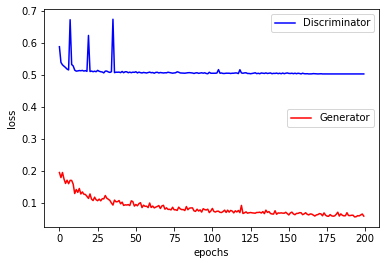

In [39]:
# Plotting the loss of 0 degree model
path1 = "./MDS Project 2/results1/LOG.txt"
plot_loss(path1)

### 2.2 Plotting the loss of 45 degree model

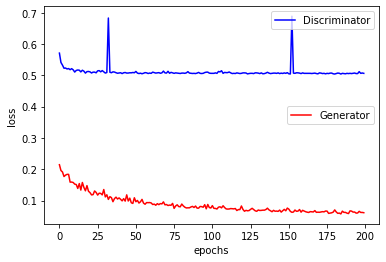

In [41]:
# Plotting the loss of 45 degree model
path2 = "./MDS Project 2/results2/LOG.txt"
plot_loss(path2)

### 2.3 Plotting the loss of 135 degree model

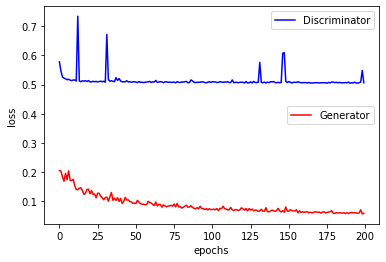

In [42]:
# Plotting the loss of 135 degree model
path3 = "./MDS Project 2/results3/LOG.txt"
plot_loss(path3)

### 2.4 Plotting the loss of 180 degree model

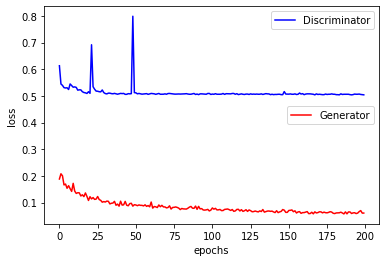

In [43]:
# Plotting the loss of 180 degree model
path4 = "./MDS Project 2/results4/LOG.txt"
plot_loss(path4)

## 3. Testing
### (Please run all the cells below this block for testing)

In [1]:
# Importing the neccessary libraries
from os import path
import torch
from tqdm import tqdm
import torchvision.datasets as dset
import torch.nn as nn
from torch .autograd import Variable
import torch.optim as optim
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from torchvision import transforms
from PIL import Image
import torchvision.utils as vutils
from IPython.display import clear_output
import datetime
from  torch.utils.data  import Dataset, DataLoader

In [2]:
# Defining the down sample class
class DownSampleConv(nn.Module):

    def __init__(self, in_channels, out_channels, kernel=4, strides=2, padding=1, activation=True, batchnorm=True):
        super().__init__()
        self.activation = activation
        self.batchnorm = batchnorm

        self.conv = nn.Conv2d(in_channels, out_channels, kernel, strides, padding)

        if batchnorm:
            self.bn = nn.BatchNorm2d(out_channels)

        if activation:
            self.act = nn.LeakyReLU(0.2)

    def forward(self, x):
        x = self.conv(x)
        if self.batchnorm:
            x = self.bn(x)
        if self.activation:
            x = self.act(x)
        return x

In [3]:
# Defining the up sample class
class UpSampleConv(nn.Module):

    def __init__(
        self,
        in_channels,
        out_channels,
        kernel=4,
        strides=2,
        padding=1,
        activation=True,
        batchnorm=True,
        dropout=False
    ):
        super().__init__()
        self.activation = activation
        self.batchnorm = batchnorm
        self.dropout = dropout

        self.deconv = nn.ConvTranspose2d(in_channels, out_channels, kernel, strides, padding)

        if batchnorm:
            self.bn = nn.BatchNorm2d(out_channels)

        if activation:
            self.act = nn.ReLU(True)

        if dropout:
            self.drop = nn.Dropout2d(0.5)

    def forward(self, x):
        x = self.deconv(x)
        if self.batchnorm:
            x = self.bn(x)

        if self.dropout:
            x = self.drop(x)
        return x

In [4]:
# Generator
class G(nn.Module):

    def __init__(self):
        super().__init__()

        # encoder/donwsample convs
        self.encoders = [
            DownSampleConv(3, 64, batchnorm=False),  # bs x 64 x 128 x 128
            DownSampleConv(64, 128),  # bs x 128 x 64 x 64
            DownSampleConv(128, 256),  # bs x 256 x 32 x 32
            DownSampleConv(256, 512),  # bs x 512 x 16 x 16
            DownSampleConv(512, 512),  # bs x 512 x 8 x 8
            DownSampleConv(512, 512),  # bs x 512 x 4 x 4
            DownSampleConv(512, 512),  # bs x 512 x 2 x 2
            DownSampleConv(512, 512, batchnorm=False),  # bs x 512 x 1 x 1
        ]

        # decoder/upsample convs
        self.decoders = [
            UpSampleConv(512, 512, dropout=True),  # bs x 512 x 2 x 2
            UpSampleConv(1024, 512, dropout=True),  # bs x 512 x 4 x 4
            UpSampleConv(1024, 512, dropout=True),  # bs x 512 x 8 x 8
            UpSampleConv(1024, 512),  # bs x 512 x 16 x 16
            UpSampleConv(1024, 256),  # bs x 256 x 32 x 32
            UpSampleConv(512, 128),  # bs x 128 x 64 x 64
            UpSampleConv(256, 64),  # bs x 64 x 128 x 128
        ]
        self.decoder_channels = [512, 512, 512, 512, 256, 128, 64]
        self.final_conv = nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1)
        self.tanh = nn.Tanh()

        self.encoders = nn.ModuleList(self.encoders)
        self.decoders = nn.ModuleList(self.decoders)

    def forward(self, x):
        skips_cons = []
        for encoder in self.encoders:
            x = encoder(x)

            skips_cons.append(x)

        skips_cons = list(reversed(skips_cons[:-1]))
        decoders = self.decoders[:-1]

        for decoder, skip in zip(decoders, skips_cons):
            x = decoder(x)
            # print(x.shape, skip.shape)
            x = torch.cat((x, skip), axis=1)

        x = self.decoders[-1](x)
        # print(x.shape)
        x = self.final_conv(x)
        return self.tanh(x)

In [5]:
# Discriminator
class D(nn.Module):

    def __init__(self):
        super().__init__()
        self.d1 = DownSampleConv(6, 64, batchnorm=False)
        self.d2 = DownSampleConv(64, 128)
        self.d3 = DownSampleConv(128, 256)
        self.d4 = DownSampleConv(256, 512)
        self.d5 = DownSampleConv(512, 512)
        self.d6 = DownSampleConv(512, 512)
        self.final = nn.Conv2d(512, 1, kernel_size = 1)
        self.sig = nn.Sigmoid()

    def forward(self, x, y):
        x = torch.cat([x, y], axis=1)
        x0 = self.d1(x)
        x1 = self.d2(x0)
        x2 = self.d3(x1)
        x3 = self.d4(x2)
        x4 = self.d5(x3)
        x5 = self.d6(x4)
        xn = self.final(x5)
        xs = self.sig(xn)
        return xs

In [6]:
# Loading all the 4 models
def load_models(path_model_1, path_model_2, path_model_3, path_model_4):
    generator0_test = G().double().cuda()
    generator0_test.load_state_dict(torch.load(path_model_1))
    generator45_test = G().double().cuda()
    generator45_test.load_state_dict(torch.load(path_model_2))
    generator135_test = G().double().cuda()
    generator135_test.load_state_dict(torch.load(path_model_3))
    generator180_test = G().double().cuda()
    generator180_test.load_state_dict(torch.load(path_model_4))
    
    return generator0_test, generator45_test, generator135_test, generator180_test

In [7]:
# Testing the generation of test images
def test_generation(path_model_1, path_model_2, path_model_3, path_model_4, path_image_test):
    # Loading the models
    g0_test, g45_test, g135_test, g180_test = load_models(path_model_1, path_model_2, path_model_3, path_model_4)
    
    # Getting all the images in the test folder
    files = os.listdir(path_image_test)
    files.sort()
    
    # Reading all the images
    i0 = cv2.resize(cv2.imread(path_image_test + "/" + files[0]), (256,256))
    i45 = cv2.resize(cv2.imread(path_image_test + "/" + files[1]), (256,256))
    i135 = cv2.resize(cv2.imread(path_image_test + "/" + files[3]), (256,256))
    i180 = cv2.resize(cv2.imread(path_image_test + "/" + files[4]), (256,256))
    
    # Making the transformations
    b0,g0,r0 = cv2.split(i0)           # get b, g, r
    rgb_i0 = cv2.merge([r0,g0,b0])
    b45,g45,r45 = cv2.split(i45)           # get b, g, r
    rgb_i45 = cv2.merge([r45,g45,b45])
    b135,g135,r135 = cv2.split(i135)           # get b, g, r
    rgb_i135 = cv2.merge([r135,g135,b135])
    b180,g180,r180 = cv2.split(i180)           # get b, g, r
    rgb_i180 = cv2.merge([r180,g180,b180])
    
    # Reading the input Image
    img = cv2.resize(cv2.imread(path_image_test + "/" + files[2]), (256,256))
    
    # Making the transformations
    b,g,r = cv2.split(img)           # get b, g, r
    rgb_img = cv2.merge([r,g,b])
    
    # Plotting the test input image
    f, axarr = plt.subplots(2,5, figsize=(20, 8))
    axarr[0][2].imshow(rgb_img)
    axarr[0][2].set_axis_off()
    axarr[0][2].set_title('Input(90)')
    
    axarr[0][0].imshow(rgb_i0)
    axarr[0][0].set_axis_off()
    axarr[0][0].set_title('Target(0)')
    
    axarr[0][1].imshow(rgb_i45)
    axarr[0][1].set_axis_off()
    axarr[0][1].set_title('Target(45)')
    
    axarr[0][3].imshow(rgb_i135)
    axarr[0][3].set_axis_off()
    axarr[0][3].set_title('Target(135)')
    
    axarr[0][4].imshow(rgb_i180)
    axarr[0][4].set_axis_off()
    axarr[0][4].set_title('Target(180)')
    
    axarr[1][2].imshow(rgb_img)
    axarr[1][2].set_axis_off()
    axarr[1][2].set_title('Input(90)')
    
    # Transposing the test image into correct dimensions
    rgb_img = rgb_img.transpose(2,1,0)

    # Normalizing the test image
    img_test = torch.from_numpy(((rgb_img/(255 / 2)) -1 )).double()

    # Reshaping the image to correct shape
    img_test=img_test.expand(1,3,256,256)

    # Generating all the 4 angles
    fake0 = g0_test(img_test.cuda())
    fake45 = g45_test(img_test.cuda())
    fake135 = g135_test(img_test.cuda())
    fake180 = g180_test(img_test.cuda())

    # De-normalizing the generated images
    fake0 = (fake0 + 1)*(255/2)
    fake45 = (fake45 + 1)*(255/2)
    fake135 = (fake135 + 1)*(255/2)
    fake180 = (fake180 + 1)*(255/2)
    
    # Converting the generated images to int
    fake0 = fake0.int()
    fake45 = fake45.int()
    fake135 = fake135.int()
    fake180 = fake180.int()

    # Converting the generated images to CPU version
    fake_viz0 = fake0[0].detach().cpu().numpy()
    fake_viz45 = fake45[0].detach().cpu().numpy()
    fake_viz135 = fake135[0].detach().cpu().numpy()
    fake_viz180 = fake180[0].detach().cpu().numpy()
    
    # Transposing the generated images back to correct shape
    fake_viz0 = fake_viz0.transpose(2,1,0)
    fake_viz45 = fake_viz45.transpose(2,1,0)
    fake_viz135 = fake_viz135.transpose(2,1,0)
    fake_viz180 = fake_viz180.transpose(2,1,0)

    # Displaying the generated images
    axarr[1][0].imshow(fake_viz0)
    axarr[1][0].set_axis_off()
    axarr[1][0].set_title('Generated(0)')
    axarr[1][1].imshow(fake_viz45)
    axarr[1][1].set_axis_off()
    axarr[1][1].set_title('Generated(45)')
    axarr[1][3].imshow(fake_viz135)
    axarr[1][3].set_axis_off()
    axarr[1][3].set_title('Generated(135)')
    axarr[1][4].imshow(fake_viz180)
    axarr[1][4].set_axis_off()
    axarr[1][4].set_title('Generated(180)')
    plt.show()

In [13]:
# Testing the generation of test images
def web_generation(path_model_1, path_model_2, path_model_3, path_model_4, path_image_test):
    # Loading the models
    g0_test, g45_test, g135_test, g180_test = load_models(path_model_1, path_model_2, path_model_3, path_model_4)
    
    # Reading the Image
    img = cv2.resize(cv2.imread(path_image_test), (256,256))
    
    # Making the transformations
    b,g,r = cv2.split(img)           # get b, g, r
    rgb_img = cv2.merge([r,g,b])
    
    # Plotting the test input image
    f, axarr = plt.subplots(1,5, figsize=(20, 20))
    axarr[2].imshow(rgb_img)
    axarr[2].set_axis_off()
    axarr[2].set_title('Input(90)')
    
    # Transposing the test image into correct dimensions
    rgb_img = rgb_img.transpose(2,1,0)

    # Normalizing the test image
    img_test = torch.from_numpy(((rgb_img/(255 / 2)) -1 )).double()

    # Reshaping the image to correct shape
    img_test=img_test.expand(1,3,256,256)

    # Generating all the 4 angles
    fake0 = g0_test(img_test.cuda())
    fake45 = g45_test(img_test.cuda())
    fake135 = g135_test(img_test.cuda())
    fake180 = g180_test(img_test.cuda())

    # De-normalizing the generated images
    fake0 = (fake0 + 1)*(255/2)
    fake45 = (fake45 + 1)*(255/2)
    fake135 = (fake135 + 1)*(255/2)
    fake180 = (fake180 + 1)*(255/2)
    
    # Converting the generated images to int
    fake0 = fake0.int()
    fake45 = fake45.int()
    fake135 = fake135.int()
    fake180 = fake180.int()

    # Converting the generated images to CPU version
    fake_viz0 = fake0[0].detach().cpu().numpy()
    fake_viz45 = fake45[0].detach().cpu().numpy()
    fake_viz135 = fake135[0].detach().cpu().numpy()
    fake_viz180 = fake180[0].detach().cpu().numpy()
    
    # Transposing the generated images back to correct shape
    fake_viz0 = fake_viz0.transpose(2,1,0)
    fake_viz45 = fake_viz45.transpose(2,1,0)
    fake_viz135 = fake_viz135.transpose(2,1,0)
    fake_viz180 = fake_viz180.transpose(2,1,0)

    # Displaying the generated images
    axarr[0].imshow(fake_viz0)
    axarr[0].set_axis_off()
    axarr[0].set_title('Generated(0)')
    axarr[1].imshow(fake_viz45)
    axarr[1].set_axis_off()
    axarr[1].set_title('Generated(45)')
    axarr[3].imshow(fake_viz135)
    axarr[3].set_axis_off()
    axarr[3].set_title('Generated(135)')
    axarr[4].imshow(fake_viz180)
    axarr[4].set_axis_off()
    axarr[4].set_title('Generated(180)')
    plt.show()

In [8]:
# Specifying the paths to all the models
path_model_1 = "/common/home/pg514/Documents/MDS Project 2/models/gen_0_256.pt"
path_model_2 = "/common/home/pg514/Documents/MDS Project 2/models/gen_45_256.pt"
path_model_3 = "/common/home/pg514/Documents/MDS Project 2/models/gen_135_256.pt"
path_model_4 = "/common/home/pg514/Documents/MDS Project 2/models/gen_180_256.pt"

### 3.1 Testing the models on test images from the dataset

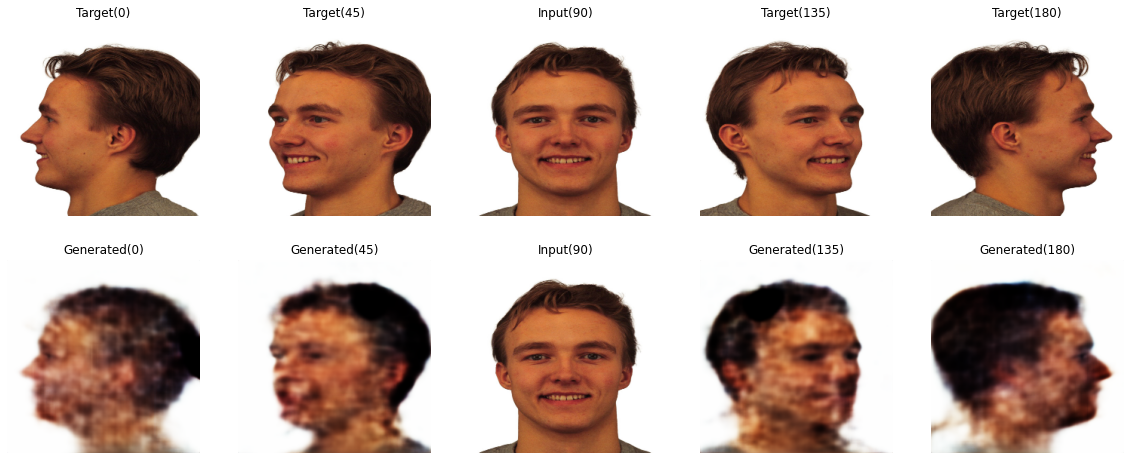

In [9]:
path_image_test = "/common/home/pg514/Documents/MDS Project 2/Dataset/Test/65"
test_generation(path_model_1, path_model_2, path_model_3, path_model_4, path_image_test)

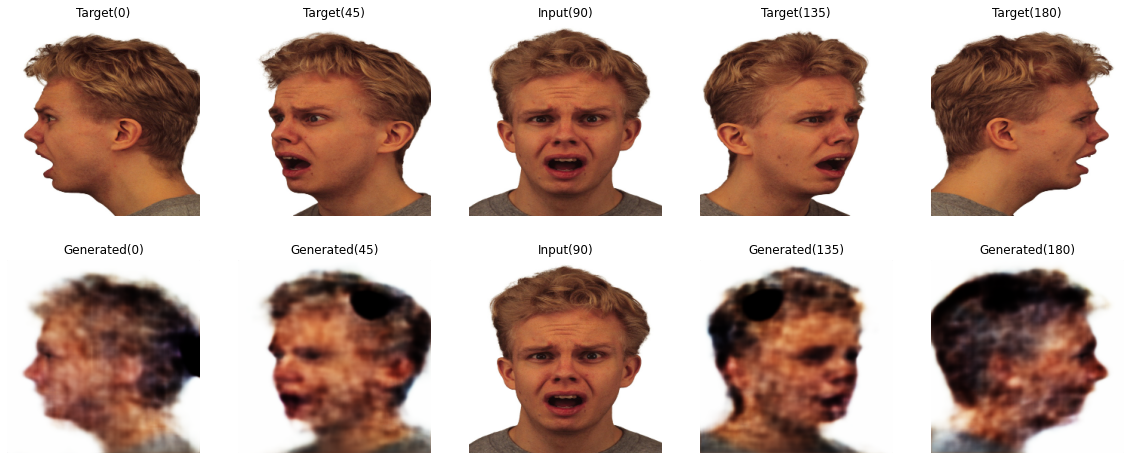

In [10]:
path_image_test = "/common/home/pg514/Documents/MDS Project 2/Dataset/Test/750"
test_generation(path_model_1, path_model_2, path_model_3, path_model_4, path_image_test)

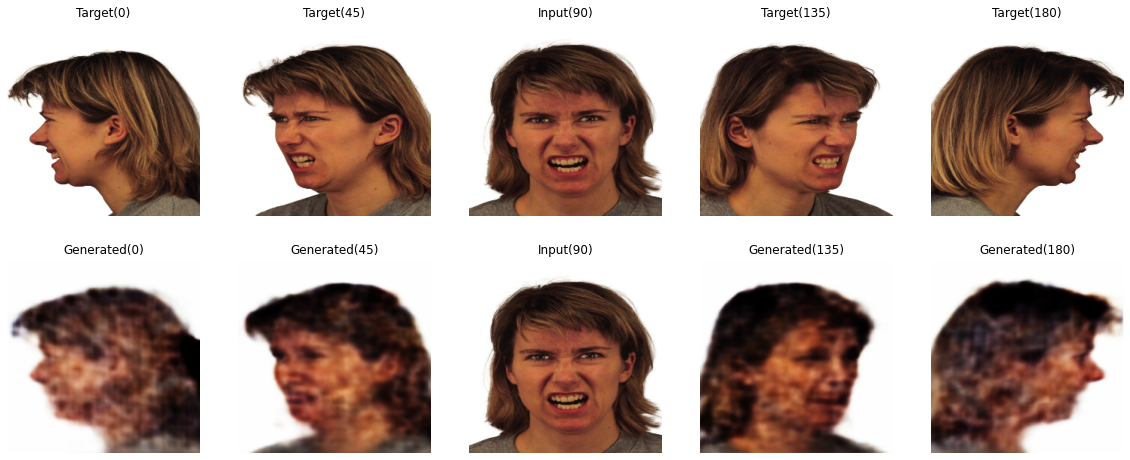

In [11]:
path_image_test = "/common/home/pg514/Documents/MDS Project 2/Dataset/Test/946"
test_generation(path_model_1, path_model_2, path_model_3, path_model_4, path_image_test)

### 3.2 Testing the models on test images from the web

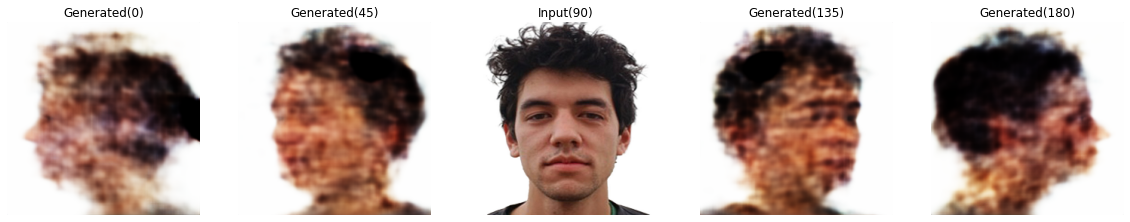

In [14]:
path_image_test = "/common/home/pg514/Documents/MDS Project 2/Dataset/Test/Web/test3.jpg"
web_generation(path_model_1, path_model_2, path_model_3, path_model_4, path_image_test)

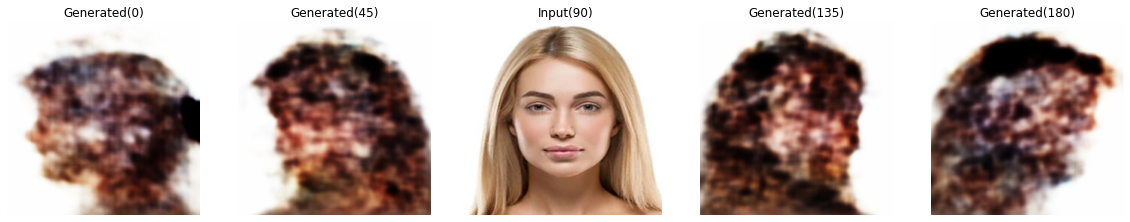

In [15]:
path_image_test = "/common/home/pg514/Documents/MDS Project 2/Dataset/Test/Web/test2.jpg"
web_generation(path_model_1, path_model_2, path_model_3, path_model_4, path_image_test)

## 4. Building the GUI using Tkinter
### (If didn't run the Testing code please run all the cells below this block to run the GUI, otherwise can skip to the last block)

In [1]:
# Importing the neccessary libraries
from os import path
import torch
from tqdm import tqdm
import torchvision.datasets as dset
import torch.nn as nn
from torch .autograd import Variable
import torch.optim as optim
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from torchvision import transforms
from PIL import Image
import torchvision.utils as vutils
from IPython.display import clear_output
import datetime
from  torch.utils.data  import Dataset, DataLoader

In [2]:
# Defining the down sample class
class DownSampleConv(nn.Module):

    def __init__(self, in_channels, out_channels, kernel=4, strides=2, padding=1, activation=True, batchnorm=True):
        super().__init__()
        self.activation = activation
        self.batchnorm = batchnorm

        self.conv = nn.Conv2d(in_channels, out_channels, kernel, strides, padding)

        if batchnorm:
            self.bn = nn.BatchNorm2d(out_channels)

        if activation:
            self.act = nn.LeakyReLU(0.2)

    def forward(self, x):
        x = self.conv(x)
        if self.batchnorm:
            x = self.bn(x)
        if self.activation:
            x = self.act(x)
        return x

In [3]:
# Defining the up sample class
class UpSampleConv(nn.Module):

    def __init__(
        self,
        in_channels,
        out_channels,
        kernel=4,
        strides=2,
        padding=1,
        activation=True,
        batchnorm=True,
        dropout=False
    ):
        super().__init__()
        self.activation = activation
        self.batchnorm = batchnorm
        self.dropout = dropout

        self.deconv = nn.ConvTranspose2d(in_channels, out_channels, kernel, strides, padding)

        if batchnorm:
            self.bn = nn.BatchNorm2d(out_channels)

        if activation:
            self.act = nn.ReLU(True)

        if dropout:
            self.drop = nn.Dropout2d(0.5)

    def forward(self, x):
        x = self.deconv(x)
        if self.batchnorm:
            x = self.bn(x)

        if self.dropout:
            x = self.drop(x)
        return x

In [4]:
# Generator
class G(nn.Module):

    def __init__(self):
        super().__init__()

        # encoder/donwsample convs
        self.encoders = [
            DownSampleConv(3, 64, batchnorm=False),  # bs x 64 x 128 x 128
            DownSampleConv(64, 128),  # bs x 128 x 64 x 64
            DownSampleConv(128, 256),  # bs x 256 x 32 x 32
            DownSampleConv(256, 512),  # bs x 512 x 16 x 16
            DownSampleConv(512, 512),  # bs x 512 x 8 x 8
            DownSampleConv(512, 512),  # bs x 512 x 4 x 4
            DownSampleConv(512, 512),  # bs x 512 x 2 x 2
            DownSampleConv(512, 512, batchnorm=False),  # bs x 512 x 1 x 1
        ]

        # decoder/upsample convs
        self.decoders = [
            UpSampleConv(512, 512, dropout=True),  # bs x 512 x 2 x 2
            UpSampleConv(1024, 512, dropout=True),  # bs x 512 x 4 x 4
            UpSampleConv(1024, 512, dropout=True),  # bs x 512 x 8 x 8
            UpSampleConv(1024, 512),  # bs x 512 x 16 x 16
            UpSampleConv(1024, 256),  # bs x 256 x 32 x 32
            UpSampleConv(512, 128),  # bs x 128 x 64 x 64
            UpSampleConv(256, 64),  # bs x 64 x 128 x 128
        ]
        self.decoder_channels = [512, 512, 512, 512, 256, 128, 64]
        self.final_conv = nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1)
        self.tanh = nn.Tanh()

        self.encoders = nn.ModuleList(self.encoders)
        self.decoders = nn.ModuleList(self.decoders)

    def forward(self, x):
        skips_cons = []
        for encoder in self.encoders:
            x = encoder(x)

            skips_cons.append(x)

        skips_cons = list(reversed(skips_cons[:-1]))
        decoders = self.decoders[:-1]

        for decoder, skip in zip(decoders, skips_cons):
            x = decoder(x)
            # print(x.shape, skip.shape)
            x = torch.cat((x, skip), axis=1)

        x = self.decoders[-1](x)
        # print(x.shape)
        x = self.final_conv(x)
        return self.tanh(x)

In [5]:
# Discriminator
class D(nn.Module):

    def __init__(self):
        super().__init__()
        self.d1 = DownSampleConv(6, 64, batchnorm=False)
        self.d2 = DownSampleConv(64, 128)
        self.d3 = DownSampleConv(128, 256)
        self.d4 = DownSampleConv(256, 512)
        self.d5 = DownSampleConv(512, 512)
        self.d6 = DownSampleConv(512, 512)
        self.final = nn.Conv2d(512, 1, kernel_size = 1)
        self.sig = nn.Sigmoid()

    def forward(self, x, y):
        x = torch.cat([x, y], axis=1)
        x0 = self.d1(x)
        x1 = self.d2(x0)
        x2 = self.d3(x1)
        x3 = self.d4(x2)
        x4 = self.d5(x3)
        x5 = self.d6(x4)
        xn = self.final(x5)
        xs = self.sig(xn)
        return xs

In [6]:
# Specifying the paths to all the models
path_model_1 = "/common/home/pg514/Documents/MDS Project 2/models/gen_0_256.pt"
path_model_2 = "/common/home/pg514/Documents/MDS Project 2/models/gen_45_256.pt"
path_model_3 = "/common/home/pg514/Documents/MDS Project 2/models/gen_135_256.pt"
path_model_4 = "/common/home/pg514/Documents/MDS Project 2/models/gen_180_256.pt"

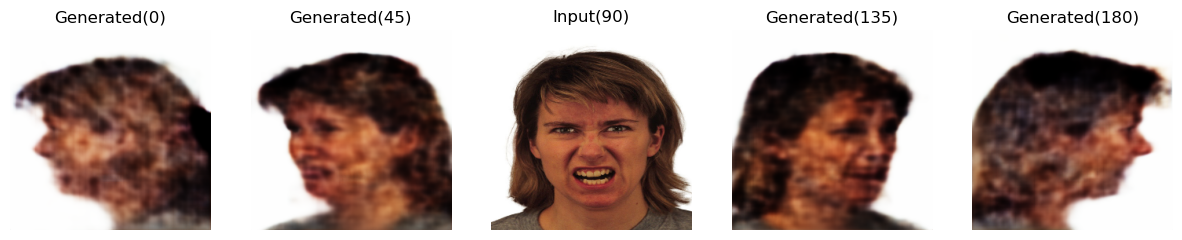

In [10]:
from tkinter import *
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg,
NavigationToolbar2Tk)
from tkinter.messagebox import showinfo
from tkinter import ttk
from tkinter import filedialog

# Loading all the 4 models
def load_models(path_model_1, path_model_2, path_model_3, path_model_4):
    generator0_test = G().double().cuda()
    generator0_test.load_state_dict(torch.load(path_model_1))
    generator45_test = G().double().cuda()
    generator45_test.load_state_dict(torch.load(path_model_2))
    generator135_test = G().double().cuda()
    generator135_test.load_state_dict(torch.load(path_model_3))
    generator180_test = G().double().cuda()
    generator180_test.load_state_dict(torch.load(path_model_4))
    
    return generator0_test, generator45_test, generator135_test, generator180_test

# Testing the generation of test images
def test_generation():
    
    show_widget(label)
    
    filetypes = (
        ('JPG files', '*.JPG'),
        ('jpg files', '*.jpg'),
        ('JPEG files', '*.jpeg'),
        ('All files', '*.*')
    )

    filename = filedialog.askopenfilename(
        title='Choose an image',
        initialdir='/',
        filetypes=filetypes)

    showinfo(
        title='Selected File',
        message=filename
    )
    
    path_image_test = filename
    
    # Loading the models
    g0_test, g45_test, g135_test, g180_test = load_models(path_model_1, path_model_2, path_model_3, path_model_4)
    
    # Reading the Image
    img = cv2.resize(cv2.imread(path_image_test), (256,256))
    
    # Making the transformations
    b,g,r = cv2.split(img)           # get b, g, r
    rgb_img = cv2.merge([r,g,b])
    
    for ax in axarr:
        ax.clear()
        
    axarr[2].imshow(rgb_img)
    axarr[2].set_axis_off()
    axarr[2].set_title('Input(90)')
    
    # Transposing the test image into correct dimensions
    rgb_img = rgb_img.transpose(2,1,0)

    # Normalizing the test image
    img_test = torch.from_numpy(((rgb_img/(255 / 2)) -1 )).double()

    # Reshaping the image to correct shape
    img_test=img_test.expand(1,3,256,256)

    # Generating all the 4 angles
    fake0 = g0_test(img_test.cuda())
    fake45 = g45_test(img_test.cuda())
    fake135 = g135_test(img_test.cuda())
    fake180 = g180_test(img_test.cuda())

    # De-normalizing the generated images
    fake0 = (fake0 + 1)*(255/2)
    fake45 = (fake45 + 1)*(255/2)
    fake135 = (fake135 + 1)*(255/2)
    fake180 = (fake180 + 1)*(255/2)
    
    # Converting the generated images to int
    fake0 = fake0.int()
    fake45 = fake45.int()
    fake135 = fake135.int()
    fake180 = fake180.int()

    # Converting the generated images to CPU version
    fake_viz0 = fake0[0].detach().cpu().numpy()
    fake_viz45 = fake45[0].detach().cpu().numpy()
    fake_viz135 = fake135[0].detach().cpu().numpy()
    fake_viz180 = fake180[0].detach().cpu().numpy()
    
    # Transposing the generated images back to correct shape
    fake_viz0 = fake_viz0.transpose(2,1,0)
    fake_viz45 = fake_viz45.transpose(2,1,0)
    fake_viz135 = fake_viz135.transpose(2,1,0)
    fake_viz180 = fake_viz180.transpose(2,1,0)

    # Displaying the generated images
    axarr[0].imshow(fake_viz0)
    axarr[0].set_axis_off()
    axarr[0].set_title('Generated(0)')
    axarr[1].imshow(fake_viz45)
    axarr[1].set_axis_off()
    axarr[1].set_title('Generated(45)')
    axarr[3].imshow(fake_viz135)
    axarr[3].set_axis_off()
    axarr[3].set_title('Generated(135)')
    axarr[4].imshow(fake_viz180)
    axarr[4].set_axis_off()
    axarr[4].set_title('Generated(180)')
    
    canvas.draw()
    hide_widget(label)
    
# the main Tkinter window
window = Tk()

# setting the title
window.title('Single To Multiple Profile Generation Of A Face Using Conditional GANs')

# dimensions of the main window
window.geometry("1500x500")

# button that displays the plot
plot_button = Button(master = window, command = test_generation, height = 2, 
                     width = 50, text = "Choose an image to Generate its multiple profiles",
                    fg='White', bg='Green')

# Plotting the test input image
fig, axarr = plt.subplots(1,5, figsize=(20, 3), dpi = 100)
# axarr[2].set_axis_off()
axarr[2].set_title('Input(90)')
# axarr[0].set_axis_off()
axarr[0].set_title('Generated(0)')
# axarr[1].set_axis_off()
axarr[1].set_title('Generated(45)')
# axarr[3].set_axis_off()
axarr[3].set_title('Generated(135)')
# axarr[4].set_axis_off()
axarr[4].set_title('Generated(180)')

# placing the canvas on the Tkinter window
canvas = FigureCanvasTkAgg(fig, master = window)
canvas.get_tk_widget().pack()

# creating the Matplotlib toolbar
toolbar = NavigationToolbar2Tk(canvas, window)
# toolbar.update()

#Create an Label Widget
label= Label(window, text= "Loading...", font= ('Helvetica bold', 14))
# label.pack(pady=20)

#Define function to hide the widget
def hide_widget(widget):
   widget.pack_forget()

#Define a function to show the widget
def show_widget(widget):
   widget.pack(pady = 20)

# place the button
# in main window
plot_button.pack(pady = 10)

# run the gui
window.mainloop()